اسماء الطلاب :
-امل حجازي
نور عبد الغني 

##Imports

In [ ]:
# Basics
import pandas as pd
import numpy as np

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.express as p1

##Dataset

In [ ]:
# Load the data
df = pd.read_csv('SampleSuperstore.csv')

In [ ]:
df.shape

(9416, 13)

In [ ]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,261.9600,2.0,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,731.9400,3.0,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,14.6200,2.0,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,957.5775,5.0,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,22.3680,2.0,0.20,2.5164


In [ ]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9416 entries, 0 to 9415
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9416 non-null   object 
 1   Segment       9416 non-null   object 
 2   Country       9416 non-null   object 
 3   City          9416 non-null   object 
 4   State         9416 non-null   object 
 5   Postal Code   9415 non-null   float64
 6   Region        9415 non-null   object 
 7   Category      9415 non-null   object 
 8   Sub-Category  9415 non-null   object 
 9   Sales         9415 non-null   float64
 10  Quantity      9415 non-null   float64
 11  Discount      9415 non-null   float64
 12  Profit        9415 non-null   float64
dtypes: float64(5), object(8)
memory usage: 956.4+ KB


In [ ]:
# Another way to see types and shape
df.shape

(9416, 13)

In [ ]:
# Data types
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code     float64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity        float64
Discount        float64
Profit          float64
dtype: object

##Missing Values

In [ ]:
# Simple way to check for missing or null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     1
Region          1
Category        1
Sub-Category    1
Sales           1
Quantity        1
Discount        1
Profit          1
dtype: int64

In [ ]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             524
State             50
Postal Code      621
Region             4
Category           3
Sub-Category      17
Sales           5601
Quantity          14
Discount          12
Profit          6965
dtype: int64

from above result the postal code and city is not necessary for our dataset so I drop it 

In [ ]:
df_drop = df.drop(['City','Postal Code'],axis = 1)
df_drop.head(1)

,Ship Mode,Segment,Country,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Kentucky,South,Furniture,Bookcases,261.96,2.0,0.0,41.9136


In [ ]:
df = df_drop

In [ ]:
df.head()

,Ship Mode,Segment,Country,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Kentucky,South,Furniture,Bookcases,261.9600,2.0,0.00,41.9136
1,Second Class,Consumer,United States,Kentucky,South,Furniture,Chairs,731.9400,3.0,0.00,219.5820
2,Second Class,Corporate,United States,California,West,Office Supplies,Labels,14.6200,2.0,0.00,6.8714
3,Standard Class,Consumer,United States,Florida,South,Furniture,Tables,957.5775,5.0,0.45,-383.0310
4,Standard Class,Consumer,United States,Florida,South,Office Supplies,Storage,22.3680,2.0,0.20,2.5164


In [ ]:
#Checking for duplicate records in the data
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 123
(9416, 11)


In [ ]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (9416, 11)
After (9293, 11)


In [ ]:
df["Ship Mode"].value_counts()

Standard Class    5520
Second Class      1824
First Class       1437
Same Day           512
Name: Ship Mode, dtype: int64

In [ ]:
df["Segment"].value_counts()

Consumer       4813
Corporate      2812
Home Office    1668
Name: Segment, dtype: int64

In [ ]:
df["State"].value_counts()

California              1806
New York                1040
Texas                    900
Pennsylvania             555
Washington               472
Illinois                 456
Ohio                     419
Florida                  360
Michigan                 243
North Carolina           241
Arizona                  210
Virginia                 208
Tennessee                182
Colorado                 178
Georgia                  176
Kentucky                 135
Massachusetts            128
Indiana                  127
Oregon                   119
New Jersey               118
Maryland                 105
Wisconsin                102
Delaware                  88
Minnesota                 86
Connecticut               79
Missouri                  66
Oklahoma                  62
Alabama                   59
Arkansas                  58
Rhode Island              53
Utah                      53
Mississippi               52
South Carolina            42
Louisiana                 41
Nevada        

In [ ]:
df["Country"].value_counts()

United States    9293
Name: Country, dtype: int64

In [ ]:
df["Region"].value_counts()

West       2950
East       2641
Central    2147
South      1554
Name: Region, dtype: int64

In [ ]:
df["Category"].value_counts()

Office Supplies    5578
Furniture          1981
Technology         1733
Name: Category, dtype: int64

In [ ]:
df["Sub-Category"].value_counts()

Binders        1427
Paper          1219
Furnishings     889
Phones          834
Storage         798
Art             743
Accessories     724
Chairs          577
Appliances      437
Labels          329
Tables          303
Envelopes       242
Bookcases       212
Fasteners       207
Supplies        176
Machines        111
Copiers          64
Name: Sub-Category, dtype: int64

In [ ]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9292.000000,9292.000000,9292.000000,9292.000000
mean,232.635774,3.798321,0.156985,29.347044
std,634.198039,2.224076,0.207441,237.356932
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.480000,2.000000,0.000000,1.688400
50%,55.475000,3.000000,0.200000,8.687750
75%,211.489000,5.000000,0.200000,29.669850
max,22638.480000,14.000000,0.800000,8399.976000


##Data Visualization

In [ ]:
corr_matrix = df.corr()
corr_matrix["Profit"].sort_values(ascending=False)

Profit      1.000000
Sales       0.495193
Quantity    0.071015
Discount   -0.218392
Name: Profit, dtype: float64

In [ ]:
corr_matrix1 = df.corr()
corr_matrix1["Quantity"].sort_values(ascending=False)

Quantity    1.000000
Sales       0.195246
Profit      0.071015
Discount    0.009030
Name: Quantity, dtype: float64

In [ ]:
corr_matrix1 = df.corr()
corr_matrix1["Discount"].sort_values(ascending=False)

Discount    1.000000
Quantity    0.009030
Sales      -0.030513
Profit     -0.218392
Name: Discount, dtype: float64

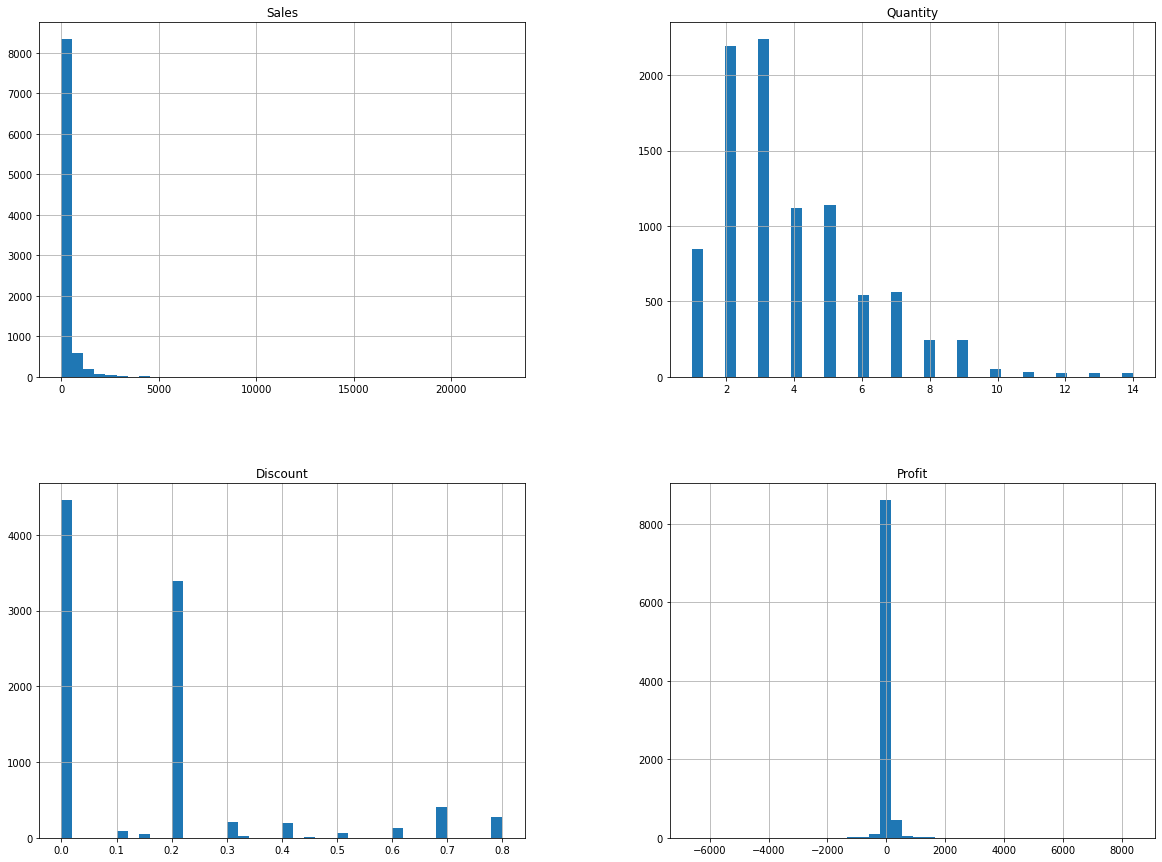

In [ ]:
df.hist(bins = 40, figsize = (20,15))
plt.show()

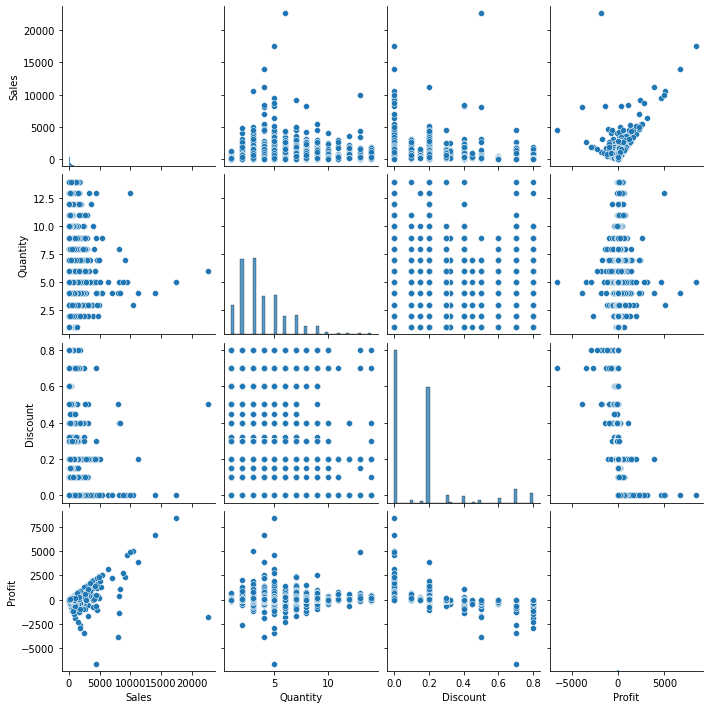

In [ ]:
ans =sns.pairplot(df)

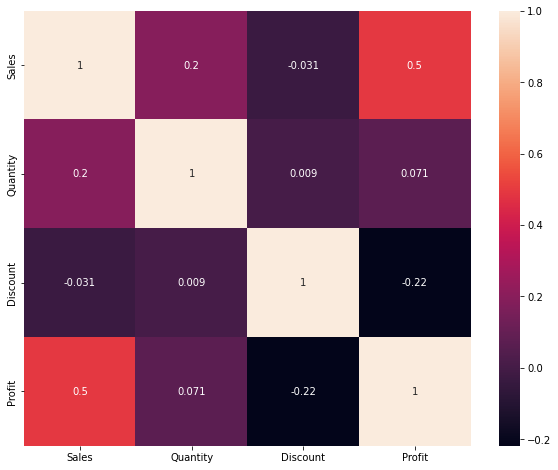

In [ ]:
# Plot the correlation with seaborn
plt.subplots(figsize = (10, 8))
sns.heatmap(corr_matrix, annot = True)
plt.show()

there is no correlation between the ptofit feature and any feature else and there is no strong correlation between two feature

#Distribution Plots

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


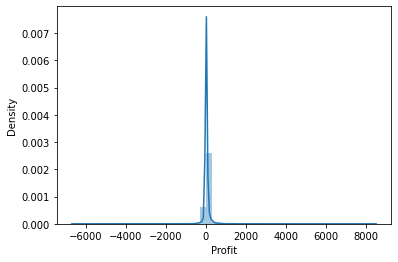

In [ ]:
sns.distplot(df.Profit)

the data distribution for profite is normal distribution 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


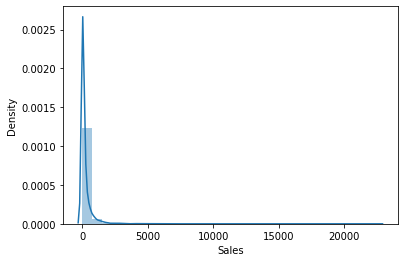

In [ ]:
sns.distplot(df['Sales'],bins=30)

the data distribution for Sales is Positive Skew distribution 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


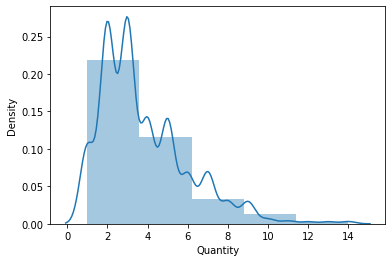

In [ ]:
sns.distplot(df.Quantity,bins=5)

the data distribution for Quantity is normal distribution also

In [ ]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
State           0
Region          1
Category        1
Sub-Category    1
Sales           1
Quantity        1
Discount        1
Profit          1
dtype: int64

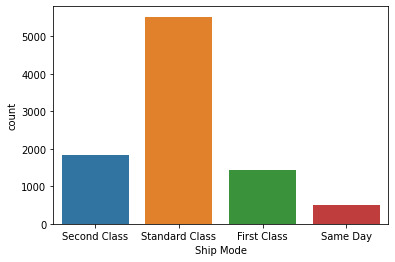

In [ ]:
ans = sns.countplot(data = df,x = 'Ship Mode')

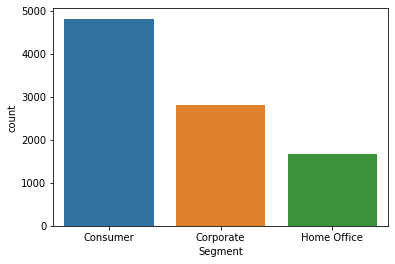

In [ ]:
ans = sns.countplot(data = df,x = 'Segment')

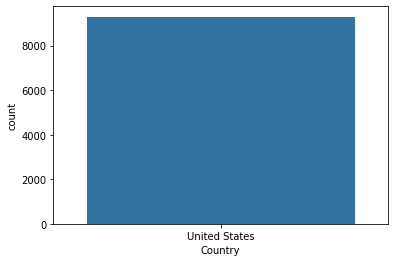

In [ ]:
ans = sns.countplot(data = df,x = 'Country')

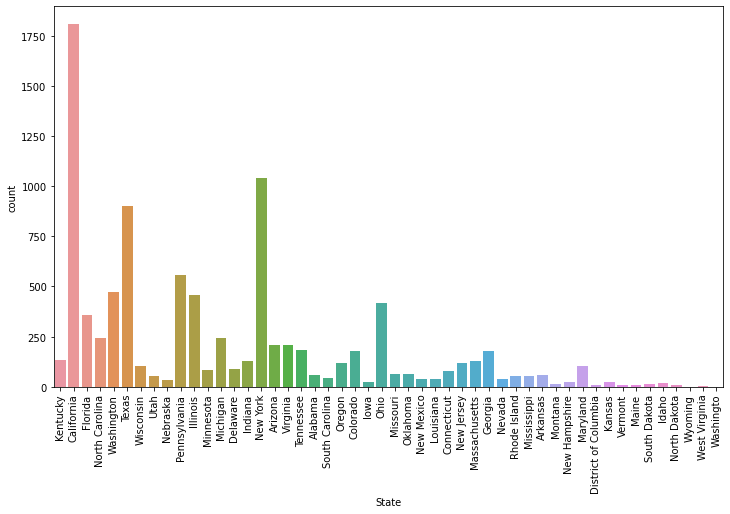

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(x=df["State"])
plt.xticks(rotation = 90)
plt.show()

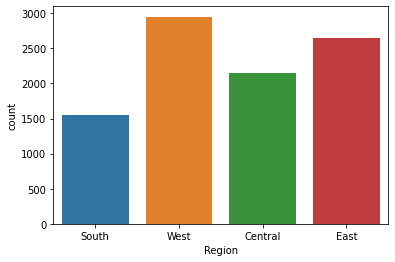

In [ ]:
ans = sns.countplot(data = df,x = 'Region')

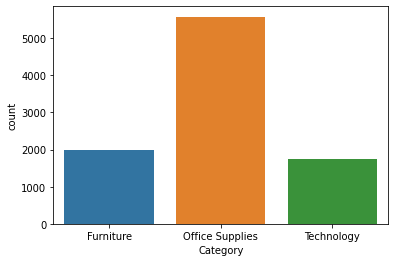

In [ ]:
ans = sns.countplot(data = df,x = 'Category')

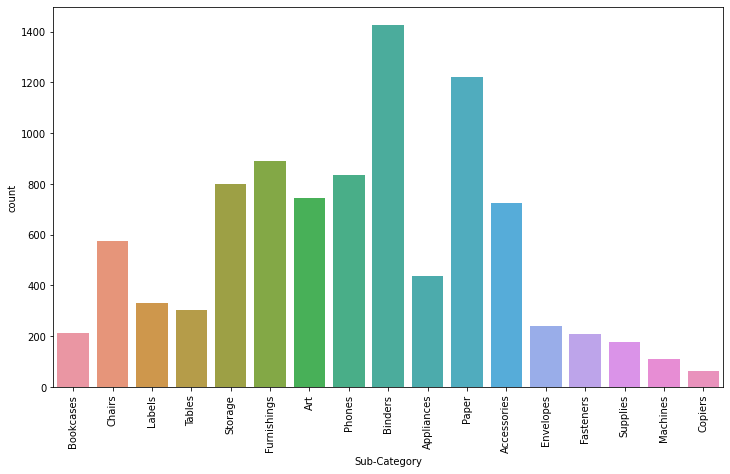

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(x=df["Sub-Category"])
plt.xticks(rotation = 90)
plt.show()

Check Outliers

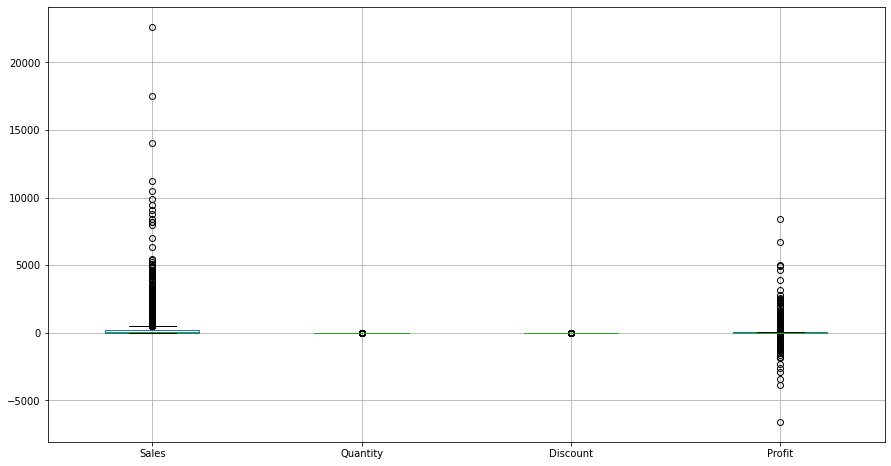

In [ ]:
plt.figure(figsize = (15,8))
df.boxplot()

In [ ]:
layout_options = {
    'paper_bgcolor':"#383838",
    'plot_bgcolor':'#383838',
    'title_font': dict(color='white'),
    'legend_font': dict(color='white'),
    'yaxis':dict(color="white"),
    'xaxis':dict(color="white")
    }

In [ ]:
fig = p1.box(df, y='Sales', x='Ship Mode', width=600, height=400)
fig.update_layout(**layout_options)
fig.show()

In [ ]:
fig = p1.box(df, y='Sales', x='Segment', width=600, height=400)
fig.update_layout(**layout_options)
fig.show()

In [ ]:
fig = p1.box(df, y='Sales', x='Country', width=600, height=400)
fig.update_layout(**layout_options)
fig.show()

In [ ]:
fig = p1.box(df, y='Sales', x='Region', width=600, height=400)
fig.update_layout(**layout_options)
fig.show()

In [ ]:
fig = p1.box(df, y='Sales', x='Category', width=600, height=400)
fig.update_layout(**layout_options)
fig.show()

In [ ]:
fig = p1.box(df, y='Sales', x='Sub-Category', width=600, height=400)
fig.update_layout(**layout_options)
fig.show()

form above we see that have outliers in sales and profit and little of it in the 'Quantity' and 'Discount'

In [ ]:
#remove outliers
q3 = df.quantile(0.75)
q1 = df.quantile(0.25)
iqr = q3 - q1

In [ ]:
df1 = df[~((df_drop < (q1 - 1.5 * iqr)) | (df_drop > (q3 + 1.5 * iqr))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



In [ ]:
df1.shape

(6626, 11)

In [ ]:
df.shape 

(9293, 11)

#what the ship Mode and segment and country have a minus profit

In [ ]:
ship = df.iloc[np.where(df.Profit<0)]

In [ ]:
ship.shape

(1857, 11)

In [ ]:
ship.head(10)

,Ship Mode,Segment,Country,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,United States,Texas,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Texas,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,United States,Pennsylvania,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,United States,Pennsylvania,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
28,Standard Class,Consumer,United States,Pennsylvania,East,Office Supplies,Binders,9.6180,2,0.70,-7.0532
32,Standard Class,Consumer,United States,Pennsylvania,East,Office Supplies,Binders,6.8580,6,0.70,-5.7150
36,First Class,Corporate,United States,Texas,Central,Furniture,Furnishings,190.9200,5,0.60,-147.9630
38,Standard Class,Home Office,United States,Texas,Central,Furniture,Bookcases,532.3992,3,0.32,-46.9764
39,Standard Class,Home Office,United States,Texas,Central,Furniture,Chairs,212.0580,3,0.30,-15.1470


In [ ]:
ship["Ship Mode"].value_counts()

Standard Class    1160
Second Class       306
First Class        293
Same Day            98
Name: Ship Mode, dtype: int64

In [ ]:
ship["Segment"].value_counts()

Consumer       995
Corporate      552
Home Office    310
Name: Segment, dtype: int64

In [ ]:
ship["Category"].value_counts()

Office Supplies    882
Furniture          706
Technology         269
Name: Category, dtype: int64

In [ ]:
ship.value_counts(subset=['Ship Mode', 'Segment']).sort_index(ascending=True)

Ship Mode       Segment    
First Class     Consumer       144
                Corporate       89
                Home Office     60
Same Day        Consumer        59
                Corporate       21
                Home Office     18
Second Class    Consumer       175
                Corporate       92
                Home Office     39
Standard Class  Consumer       617
                Corporate      350
                Home Office    193
dtype: int64

In [ ]:
ship.value_counts(subset=['Ship Mode', 'Segment','Country']).sort_index(ascending=True)

Ship Mode       Segment      Country      
First Class     Consumer     United States    144
                Corporate    United States     89
                Home Office  United States     60
Same Day        Consumer     United States     59
                Corporate    United States     21
                Home Office  United States     18
Second Class    Consumer     United States    175
                Corporate    United States     92
                Home Office  United States     39
Standard Class  Consumer     United States    617
                Corporate    United States    350
                Home Office  United States    193
dtype: int64

In [ ]:
ship.groupby(["Ship Mode", "Segment"]).size()

Ship Mode       Segment    
First Class     Consumer       144
                Corporate       89
                Home Office     60
Same Day        Consumer        59
                Corporate       21
                Home Office     18
Second Class    Consumer       175
                Corporate       92
                Home Office     39
Standard Class  Consumer       617
                Corporate      350
                Home Office    193
dtype: int64

WHAT is The category how have a hight discount and profit

In [ ]:
Gp1 = df.groupby(['Category']).Discount.sum().sort_values(ascending = False).reset_index()
Gp2 =df.groupby(['Category']).Profit.sum().sort_values(ascending = False).reset_index()
merge12= pd.merge(Gp1, Gp2, how='right',on='Category')
merge12.rename(columns={'Discount':'Discount','Profit':'Profit'},inplace = True)
merge12

,Category,Discount,Profit
0,Technology,227.8,139853.4227
1,Office Supplies,886.2,116631.7299
2,Furniture,344.7,16207.5844


In [ ]:
Gp1 = df1.groupby(['Category']).Discount.sum().sort_values(ascending = False).reset_index()
Gp2 =df1.groupby(['Category']).Profit.sum().sort_values(ascending = False).reset_index()
merge11= pd.merge(Gp1, Gp2, how='right',on='Category')
merge11.rename(columns={'Discount':'Discount','Profit':'Profit'},inplace = True)
merge11

,Category,Discount,Profit
0,Office Supplies,368.30,53461.3543
1,Technology,140.50,19735.5222
2,Furniture,132.71,13522.8339


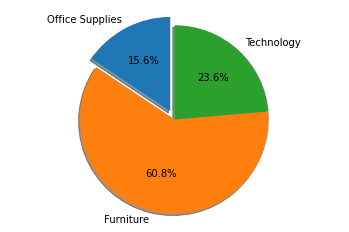

In [ ]:
Category = 'Office Supplies','Furniture', 'Technology'
fig1, ax1 = plt.subplots()
explode=(0.1,0,0)#It"explode" the 1st slice
ax1.pie(merge12["Discount"],explode=explode, labels=Category, autopct='%1.1f%%',shadow=True,startangle=90)##explode must be a length of X
ax1.axis('equal')#Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

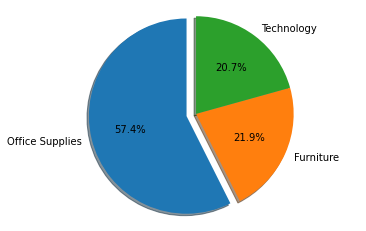

In [ ]:
Category = 'Office Supplies','Furniture', 'Technology'
fig1, ax1 = plt.subplots()
explode=(0.1,0,0)#It"explode" the 1st slice
ax1.pie(merge11["Discount"],explode=explode, labels=Category, autopct='%1.1f%%',shadow=True,startangle=90)##explode must be a length of X
ax1.axis('equal')#Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

from above you can found that the furniture categories have a high Discount  

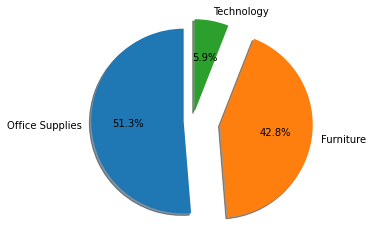

In [ ]:
fig1, ax1 = plt.subplots()
explode=(0.1,0.3,0.1)#It"explode" the 1st slice
ax1.pie(merge12["Profit"],explode=explode, labels=Category, autopct='%1.1f%%',shadow=True,startangle=90)##explode must be a length of X
ax1.axis('equal')#Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

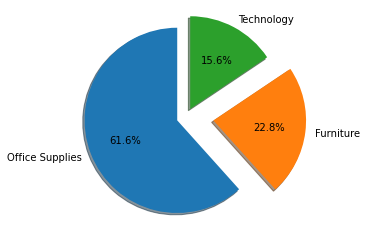

In [ ]:
fig1, ax1 = plt.subplots()
explode=(0.1,0.3,0.1)#It"explode" the 1st slice
ax1.pie(merge11["Profit"],explode=explode, labels=Category, autopct='%1.1f%%',shadow=True,startangle=90)##explode must be a length of X
ax1.axis('equal')#Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

from above you can found that the Office Supplies categories have a high profit

from the profit and Discount we found that "furniture" has a big discount and profit so the discount help to increase the profit and in "technology" Category we find lowest discount among all categories but gaining good amount of profit but in "office supplies" we found facing loss

In [ ]:
Category = df.groupby('Category').sum()
Category.loc[:,'Sales']

Category
Furniture          683552.0917
Office Supplies    676405.3650
Technology         801694.1530
Name: Sales, dtype: float64

In [ ]:
cat = [cat for cat, df2 in df.groupby('Category')]

In [ ]:
df.groupby('Category')['Profit'].sum()

Category
Furniture           16207.5844
Office Supplies    116631.7299
Technology         139853.4227
Name: Profit, dtype: float64

Text(0.5, 1.0, 'Category vs Sales')

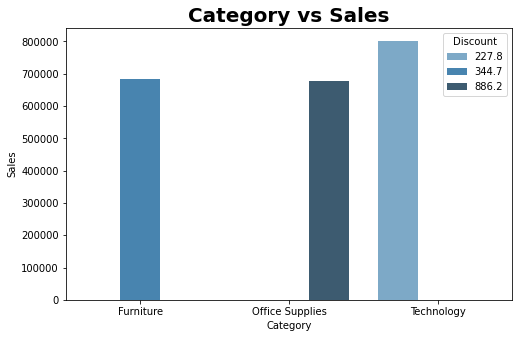

In [ ]:
plt.figure(figsize = (8,5))
sns.barplot(x = cat, y = Category['Sales'], hue = 'Discount', data = Category, palette = 'Blues_d')
plt.xlabel('Category', fontsize = 10)
plt.ylabel('Sales', fontsize = 10)
plt.title('Category vs Sales', fontsize = 20, fontweight = 'bold')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Category vs Sales')

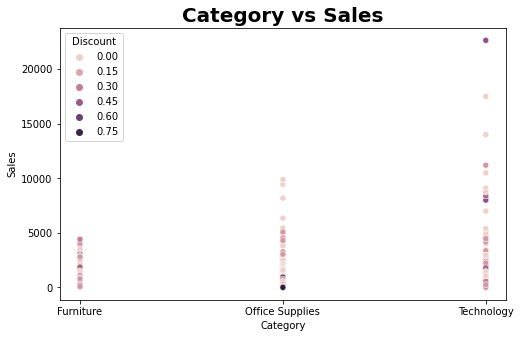

In [ ]:
plt.figure(figsize = (8,5))
sns.scatterplot(df['Category'], df['Sales'], hue = df['Discount'])
plt.xlabel('Category', fontsize = 10)
plt.ylabel('Sales', fontsize = 10)
plt.title("Category vs Sales", fontsize = 20, fontweight = 'bold')

From the above two plots, we can infer that, the Category of 'Technology' provides more sales with 0% discount.

WHAT is The Region how have a hight discount and profit

In [ ]:
Gp3 = df.groupby(['Region']).Discount.sum().sort_values(ascending = False).reset_index()
Gp4 =df.groupby(['Region']).Profit.sum().sort_values(ascending = False).reset_index()
merge22= pd.merge(Gp3, Gp4, how='right',on='Region')
merge22.rename(columns={'Discount':'Discount','Profit':'Profit'},inplace = True)
merge22

,Region,Discount,Profit
0,West,328.75,99514.1482
1,East,385.70,85308.0205
2,South,229.65,46394.4897
3,Central,514.60,41476.0786


In [ ]:
Gp3 = df1.groupby(['Region']).Discount.sum().sort_values(ascending = False).reset_index()
Gp4 =df1.groupby(['Region']).Profit.sum().sort_values(ascending = False).reset_index()
merge21= pd.merge(Gp3, Gp4, how='right',on='Region')
merge21.rename(columns={'Discount':'Discount','Profit':'Profit'},inplace = True)
merge21

,Region,Discount,Profit
0,West,193.75,31957.0139
1,East,180.00,23402.3218
2,Central,157.76,16388.4858
3,South,110.00,14971.8889


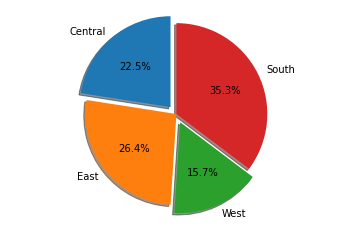

In [ ]:
Region =  'Central', 'East','West','South'
fig1, ax1 = plt.subplots()
explode=(0.1,0,0.1,0)#It"explode" the 1st slice
ax1.pie(merge22["Discount"],explode=explode, labels=Region, autopct='%1.1f%%',shadow=True,startangle=90)##explode must be a length of X
ax1.axis('equal')#Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

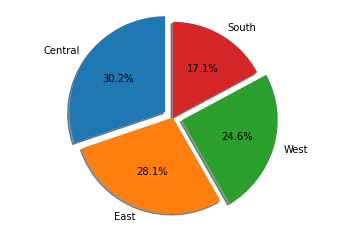

In [ ]:
Region =  'Central', 'East','West','South'
fig1, ax1 = plt.subplots()
explode=(0.1,0,0.1,0)#It"explode" the 1st slice
ax1.pie(merge21["Discount"],explode=explode, labels=Region, autopct='%1.1f%%',shadow=True,startangle=90)##explode must be a length of X
ax1.axis('equal')#Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

from above you can found that the south Region have a high Discount

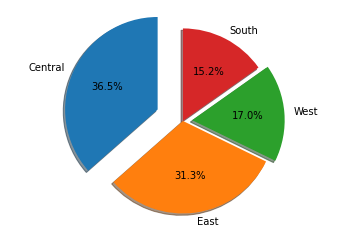

In [ ]:
Region =  'Central', 'East','West','South'
fig1, ax1 = plt.subplots()
explode=(0.3,0,0.1,0)#It"explode" the 1st slice
ax1.pie(merge22["Profit"],explode=explode, labels=Region, autopct='%1.1f%%',shadow=True,startangle=90)##explode must be a length of X
ax1.axis('equal')#Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

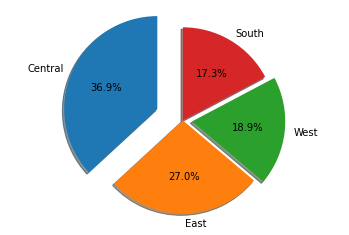

In [ ]:
Region =  'Central', 'East','West','South'
fig1, ax1 = plt.subplots()
explode=(0.3,0,0.1,0)#It"explode" the 1st slice
ax1.pie(merge21["Profit"],explode=explode, labels=Region, autopct='%1.1f%%',shadow=True,startangle=90)##explode must be a length of X
ax1.axis('equal')#Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

From the above two charts we can obseved a huge amount of loss in "central" Region beacause Company(store) is offering high Discount on Products in the Central Region but Outcome is very less.Now take a look at the percentage of "West" Region og Discount & Profit almost here Profit is double the Discount

In [ ]:
Region = df1.groupby('Region').sum()
Region.loc[:,'Sales']

Region
Central    105476.8248
East       131614.5840
South       83007.4210
West       187784.2955
Name: Sales, dtype: float64

In [ ]:
sm = [ sm for sm, df2 in df.groupby('Region')]

Text(0.5, 1.0, 'Region vs Sales')

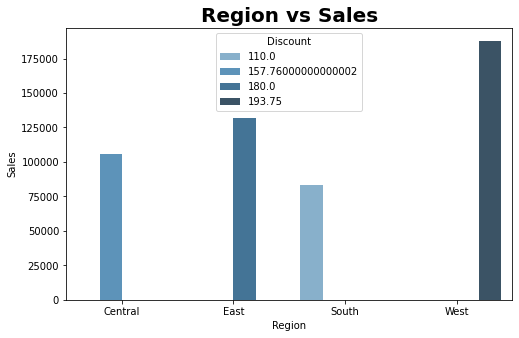

In [ ]:
plt.figure(figsize = (8,5))
sns.barplot(x = sm, y = Region['Sales'], hue = 'Discount', data = Region, palette = 'Blues_d')
plt.xlabel('Region', fontsize = 10)
plt.ylabel('Sales', fontsize = 10)
plt.title('Region vs Sales', fontsize = 20, fontweight = 'bold')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Region vs Sales')

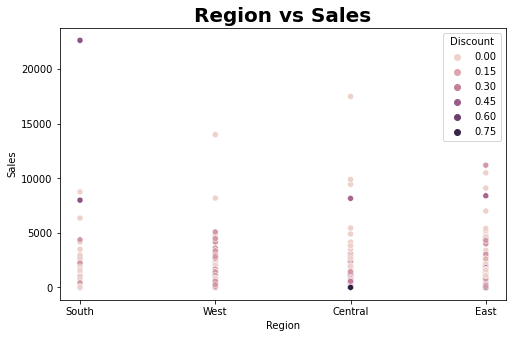

In [ ]:
plt.figure(figsize = (8,5))
sns.scatterplot(df['Region'], df['Sales'], hue = df['Discount'])
plt.xlabel('Region', fontsize = 10)
plt.ylabel('Sales', fontsize = 10)
plt.title("Region vs Sales", fontsize = 20, fontweight = 'bold')

WHAT is The Ship Mode how have a hight discount and profit

In [ ]:
Gp3 = df1.groupby(['Ship Mode']).Discount.sum().sort_values(ascending = False).reset_index()
Gp4 =df1.groupby(['Ship Mode']).Profit.sum().sort_values(ascending = False).reset_index()
merge3= pd.merge(Gp3, Gp4, how='right',on='Ship Mode')
merge3.rename(columns={'Discount':'Discount','Profit':'Profit'},inplace = True)
merge3

,Ship Mode,Discount,Profit
0,Standard Class,383.32,51536.4285
1,Second Class,120.80,17113.2579
2,First Class,103.79,13645.2970
3,Same Day,33.60,4424.7270


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 9 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 9 missing from current font.



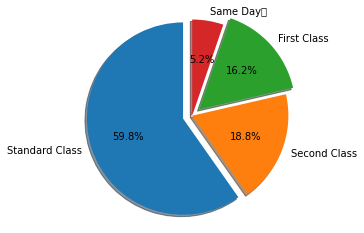

In [ ]:
Region =  'Standard Class', 'Second Class','First Class','Same Day'
fig1, ax1 = plt.subplots()
explode=(0.1,0,0.1,0)#It"explode" the 1st slice
ax1.pie(merge3["Discount"],explode=explode, labels=Region, autopct='%1.1f%%',shadow=True,startangle=90)##explode must be a length of X
ax1.axis('equal')#Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

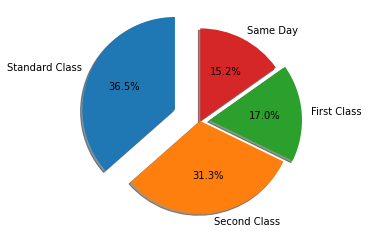

In [ ]:
Region =  'Standard Class', 'Second Class','First Class','Same Day'
fig1, ax1 = plt.subplots()
explode=(0.3,0,0.1,0)#It"explode" the 1st slice
ax1.pie(merge22["Profit"],explode=explode, labels=Region, autopct='%1.1f%%',shadow=True,startangle=90)##explode must be a length of X
ax1.axis('equal')#Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

from the profit and Discount we found that "Standard Class" and "Second Class" has a big discount and profit so the discount help to increase the profit and in "Same Day" Category we find lowest discount among all categories but gaining good amount of profit but in "First Class" we found facing loss

In [ ]:
Ship = df1.groupby('Ship Mode').sum()
Ship.loc[:,'Sales']

Ship Mode
First Class        80971.9879
Same Day           25790.0150
Second Class      100352.8255
Standard Class    300768.2969
Name: Sales, dtype: float64

In [ ]:
sm = [ sm for sm, df2 in df.groupby('Ship Mode')]

Text(0.5, 1.0, 'Ship Mode vs Sales')

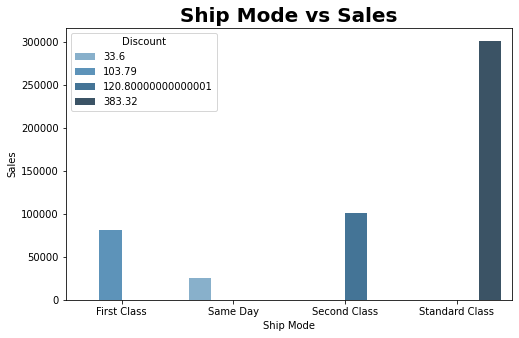

In [ ]:
plt.figure(figsize = (8,5))
sns.barplot(x = sm, y = Ship['Sales'], hue = 'Discount', data = Ship, palette = 'Blues_d')
plt.xlabel('Ship Mode', fontsize = 10)
plt.ylabel('Sales', fontsize = 10)
plt.title('Ship Mode vs Sales', fontsize = 20, fontweight = 'bold')

the high average of Discount is "Standard Class"

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Ship Mode vs Sales')

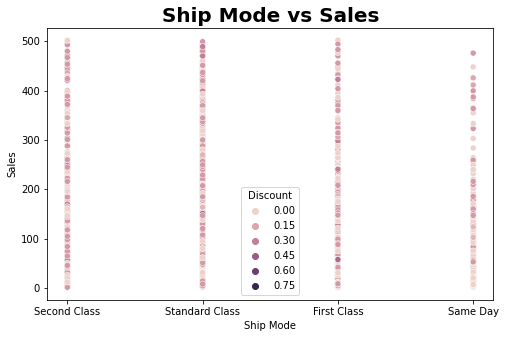

In [ ]:
plt.figure(figsize = (8,5))
sns.scatterplot(df1['Ship Mode'], df['Sales'], hue = df['Discount'])
plt.xlabel('Ship Mode', fontsize = 10)
plt.ylabel('Sales', fontsize = 10)
plt.title("Ship Mode vs Sales", fontsize = 20, fontweight = 'bold')

From the above two plots, we can infer that, the ship mode of 'Standard Class' provides more sales with 0% discount. Also, the ship mode of 'Second Class' provides provides average sales mostly with 0% and 20% discount.

WHAT the relation between state and profit

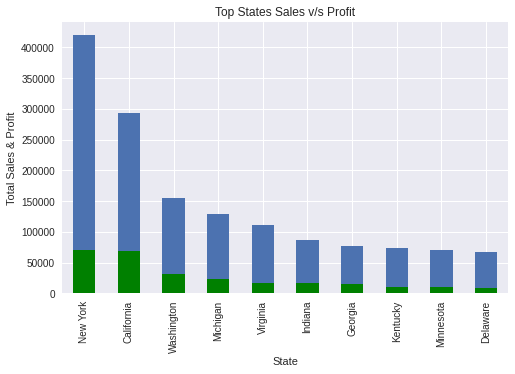

In [ ]:
top_state_sales = df.groupby("State").Sales.sum().nlargest(n=10)
top_state_profit = df.groupby("State").Profit.sum().nlargest(n=10)

plt.style.use('seaborn')
top_state_sales.plot(kind='bar',figsize=(8,5),fontsize=10)
top_state_profit.plot(kind='bar',figsize=(8,5),fontsize=10,color='green')
plt.xlabel('State')
plt.ylabel('Total Sales & Profit')
plt.title('Top States Sales v/s Profit')
plt.show()

"New York" and "California" has a high profit and Sales

WHAT is the high subcategory in profit and sales

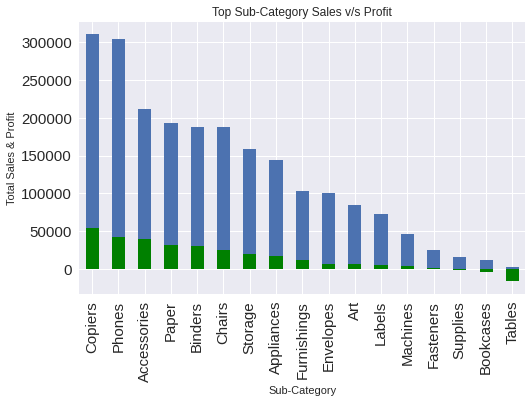

In [ ]:
top_subcategory_sales = df.groupby("Sub-Category").Sales.sum().nlargest(n=100)

top_subcategory_profit = df.groupby("Sub-Category").Profit.sum().nlargest(n=100)
plt.style.use('seaborn')
top_subcategory_sales.plot(kind='bar',figsize=(8,5),fontsize=15)
top_subcategory_profit.plot(kind='bar',figsize=(8,5),fontsize=15,color='green')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales & Profit')
plt.title('Top Sub-Category Sales v/s Profit')
plt.show()

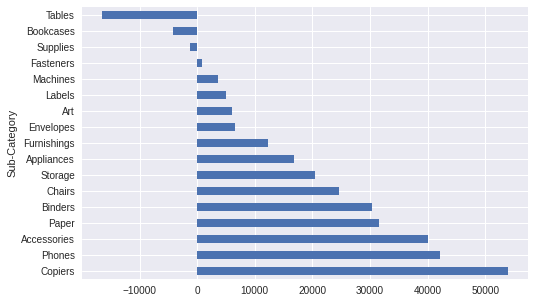

In [ ]:
plt.figure(figsize=(8,5))
category_wise_profit=df.groupby(['Sub-Category'])['Profit'].sum().nlargest(50)
category_wise_profit.plot.barh()

from above he "Copiers" Sub-Category has high profit

WHAT is The relation between DISCOUNT and SALES

In [ ]:
Discount = df.groupby('Discount').sum()
Discount.loc[:,'Sales']

Discount
0.00    1.034667e+06
0.10    4.795953e+04
0.15    2.242569e+04
0.20    7.159682e+05
0.30    9.787456e+04
0.32    1.070693e+04
0.40    1.073552e+05
0.45    5.484974e+03
0.50    5.882707e+04
0.60    6.025056e+03
0.70    4.016995e+04
0.80    1.418711e+04
Name: Sales, dtype: float64

In [ ]:
dis = [ dis for dis, df2 in df.groupby('Discount')]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



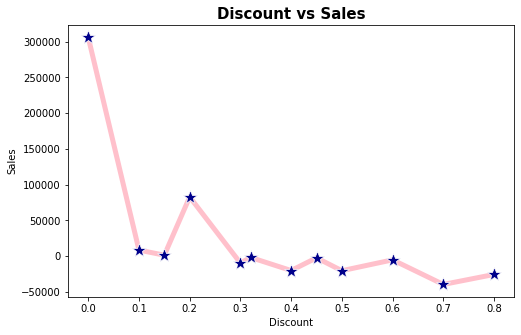

In [ ]:
plt.figure(figsize = (8,5))
sns.lineplot(dis, Discount['Profit'], color = 'pink', marker = "*", markersize = 15, markerfacecolor = 'darkblue', linewidth = 5)
plt.title('Discount vs Sales', fontsize = 15, fontweight = 'bold')
plt.xlabel('Discount', fontsize = 10)
plt.ylabel('Sales', fontsize = 10)
plt.show()

From the above plot, the discount range of 0% gives more sales. Secondly, the discount range of 0.2 gives moderate sales.